In [145]:
#Importing other libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Importing Tensorflow
import tensorflow as tf

# MNIST

In [146]:
#Loading Dataset
mnist = tf.keras.datasets.mnist

In [147]:
#Splitting into variables
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [148]:
#Dimension of each Image
x_train.shape

(60000, 28, 28)

In [149]:
#Finding the number of classes
len(np.unique(y_test))

10

In [150]:
#Maximum Value
np.max(x_train[0])

255

In [151]:
#Minimum Value
np.min(x_train[0])

0

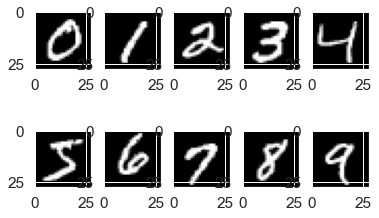

In [152]:
(x,id) = np.unique(y_train, return_index=True)
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[id[i]],cmap="gray")

In [153]:
#Performing Normalization
x_train = x_train/255.0
x_test = x_test/255.0

### Model 1 - CNN

In [154]:
#Building Model1
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input((28,28,1)))
model1.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = "relu", padding = "valid")) # Conv2D
model1.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))                                         # MaxPooling
model1.add(tf.keras.layers.Flatten())                                                               # Flatten
model3.add(tf.keras.layers.Dense(100, activation='relu'))              
model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 5408)              0         
                                                                 
 OutputLayer (Dense)         (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [155]:
#Process during compilation of Model1
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
M1 = model1.fit(x_train, y_train,batch_size=40, epochs=20, validation_split=0.1)

Epoch 1/20
1350/1350 [==============================] - 8s 6ms/step - loss: 0.2425 - accuracy: 0.9326 - val_loss: 0.0898 - val_accuracy: 0.9780
Epoch 2/20
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0875 - accuracy: 0.9743 - val_loss: 0.0748 - val_accuracy: 0.9785
Epoch 3/20
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0654 - accuracy: 0.9812 - val_loss: 0.0625 - val_accuracy: 0.9837
Epoch 4/20
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0539 - accuracy: 0.9840 - val_loss: 0.0558 - val_accuracy: 0.9852
Epoch 5/20
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0456 - accuracy: 0.9865 - val_loss: 0.0573 - val_accuracy: 0.9857
Epoch 6/20
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0618 - val_accuracy: 0.9848
Epoch 7/20
1350/1350 [==============================] - 8s 6ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0549 - val_accuracy:

In [156]:
#Evaluating The Model1
model1.evaluate(x_test, y_test)
from sklearn import metrics
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred1))

313/313 [==============================] - 1s 2ms/step - loss: 0.0696 - accuracy: 0.9846
Accuracy :  0.9838


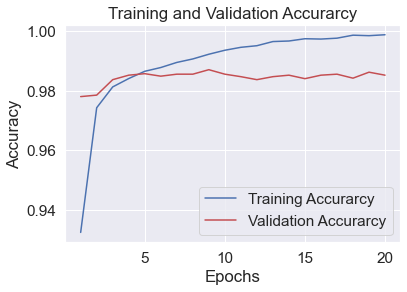

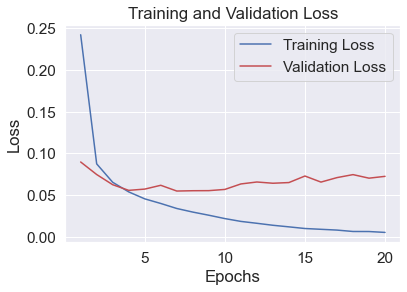

In [157]:
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = M1.history['accuracy']
val_acc = M1.history['val_accuracy']
loss = M1.history['loss']
val_loss = M1.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Model 2 - LeNet

In [158]:
#LeNet model receives 32 by 32 images so padding is done
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255 
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
print(x_train.shape)
# Expanding Dimension
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
print(x_train.shape)

(60000, 32, 32)
(60000, 32, 32, 1)


In [159]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:])) #Conv2D 1
model2.add(tf.keras.layers.AveragePooling2D(2))                   # Pooling
model2.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))                               #Conv2D 2
model2.add(tf.keras.layers.AveragePooling2D(2))                   # Pooling
model2.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))                              #Conv2D 3
model2.add(tf.keras.layers.Flatten())                                             # Flatten
model2.add(tf.keras.layers.Dense(84, activation='tanh'))                          # Dense
model2.add(tf.keras.layers.Dense(10, activation='softmax'))                       # Dense
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_12 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_25 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_13 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_26 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_11 (Flatten)        (None, 120)             

In [160]:
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history2 = model2.fit(x_train, y_train,batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4781 - accuracy: 0.8496 - val_loss: 0.2310 - val_accuracy: 0.9325
Epoch 2/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2399 - accuracy: 0.9258 - val_loss: 0.1595 - val_accuracy: 0.9547
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1799 - accuracy: 0.9438 - val_loss: 0.1347 - val_accuracy: 0.9590
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1406 - accuracy: 0.9559 - val_loss: 0.1078 - val_accuracy: 0.9675
Epoch 5/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.1143 - accuracy: 0.9639 - val_loss: 0.0972 - val_accuracy: 0.9727
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0972 - accuracy: 0.9693 - val_loss: 0.0923 - val_accuracy: 0.9747
Epoch 7/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0835 - accuracy: 0.9738 - val_loss: 0.0937 - val_accurac

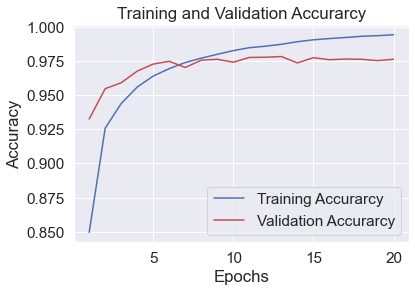

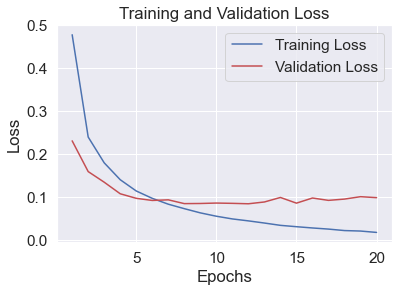

In [161]:
#Plotting The Graphs for Accuracy and Loss of Model2
sns.set_style("darkgrid")
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [162]:
#Evaluating The Model2
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9762


[0.0933564305305481, 0.9761999845504761]

# CIFAR-10

In [163]:
# load dataset
from keras.datasets import cifar10
(trainX, trainy), (testX, testy) = cifar10.load_data()
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

170498071/170498071 [==============================] - 16s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


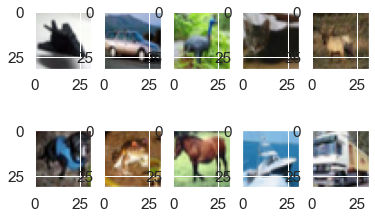

In [165]:
(x,id) = np.unique(trainy, return_index=True)
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(trainX[id[i]],cmap="gray")

In [166]:
trainX = trainX / 255.0
testX = testX / 255.0

# Model 3 - CNN

In [183]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.Input((32,32,3)))
model3.add(tf.keras.layers.Conv2D(32, (3, 3), activation='tanh', padding='valid'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(100, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 7200)              0         
                                                                 
 dense_17 (Dense)            (None, 100)               720100    
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 722,006
Trainable params: 722,006
Non-trainable params: 0
_______________________________________________

In [184]:
model3.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
M3 = model3.fit(trainX, trainy,batch_size=40, epochs=10, validation_split=0.1)

Epoch 1/10
1125/1125 [==============================] - 16s 14ms/step - loss: 1.4873 - accuracy: 0.4743 - val_loss: 1.2637 - val_accuracy: 0.5496
Epoch 2/10
1125/1125 [==============================] - 16s 14ms/step - loss: 1.1470 - accuracy: 0.6000 - val_loss: 1.1830 - val_accuracy: 0.5862
Epoch 3/10
1125/1125 [==============================] - 16s 14ms/step - loss: 0.9761 - accuracy: 0.6607 - val_loss: 1.1596 - val_accuracy: 0.6114
Epoch 4/10
1125/1125 [==============================] - 15s 14ms/step - loss: 0.8497 - accuracy: 0.7069 - val_loss: 1.1119 - val_accuracy: 0.6260
Epoch 5/10
1125/1125 [==============================] - 17s 15ms/step - loss: 0.7395 - accuracy: 0.7434 - val_loss: 1.1858 - val_accuracy: 0.6144
Epoch 6/10
1125/1125 [==============================] - 16s 14ms/step - loss: 0.6429 - accuracy: 0.7767 - val_loss: 1.1740 - val_accuracy: 0.6342
Epoch 7/10
1125/1125 [==============================] - 17s 15ms/step - loss: 0.5523 - accuracy: 0.8107 - val_loss: 1.2026 -

In [185]:
model3.evaluate(testX, testy)

313/313 [==============================] - 1s 3ms/step - loss: 1.4921 - accuracy: 0.6166


[1.4920520782470703, 0.616599977016449]

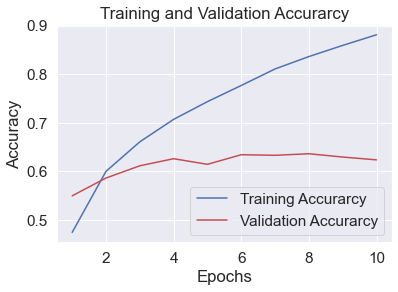

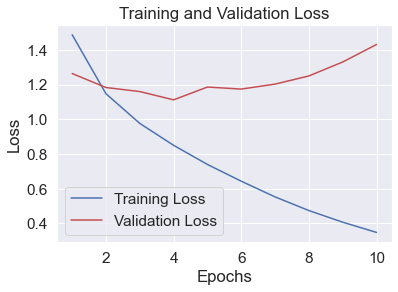

In [186]:
#Plotting The Graphs for Accuracy and Loss of Model3
sns.set_style("darkgrid")
acc = M3.history['accuracy']
val_acc = M3.history['val_accuracy']
loss = M3.history['loss']
val_loss = M3.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Model 4 - LeNet5

In [187]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=trainX.shape[1:])) #Conv2D 1
model4.add(tf.keras.layers.AveragePooling2D(2))                   # Pooling
model4.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))                               #Conv2D 2
model4.add(tf.keras.layers.AveragePooling2D(2))                   # Pooling
#model4.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))                              #Conv2D 3
model4.add(tf.keras.layers.Flatten())                                             # Flatten
model4.add(tf.keras.layers.Dense(84, activation='tanh'))                          # Dense
model4.add(tf.keras.layers.Dense(10, activation='softmax'))                       # Dense
model4.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_14 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_34 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_15 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_35 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_16 (Flatten)        (None, 120)             

In [188]:
model4.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
M4 = model4.fit(trainX, trainy,batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.8204 - accuracy: 0.3538 - val_loss: 1.6878 - val_accuracy: 0.4044
Epoch 2/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5862 - accuracy: 0.4390 - val_loss: 1.5447 - val_accuracy: 0.4492
Epoch 3/10
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4515 - accuracy: 0.4842 - val_loss: 1.4290 - val_accuracy: 0.4940
Epoch 4/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3685 - accuracy: 0.5134 - val_loss: 1.3920 - val_accuracy: 0.5030
Epoch 5/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3035 - accuracy: 0.5390 - val_loss: 1.3769 - val_accuracy: 0.5068
Epoch 6/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.2524 - accuracy: 0.5565 - val_loss: 1.3460 - val_accuracy: 0.5276
Epoch 7/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.2017 - accuracy: 0.5760 - val_loss: 1.3288 - val_ac

In [189]:
model4.evaluate(testX, testy)

313/313 [==============================] - 1s 3ms/step - loss: 1.3062 - accuracy: 0.5393


[1.30620276927948, 0.5393000245094299]

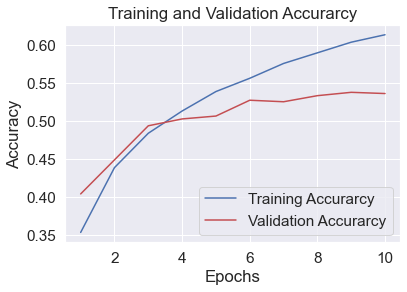

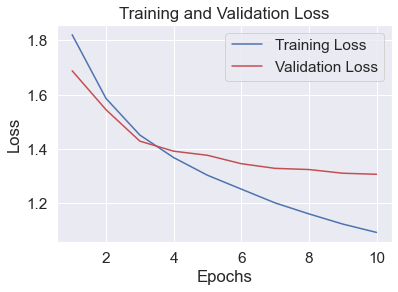

In [190]:
#Plotting The Graphs for Accuracy and Loss of Model3
sns.set_style("darkgrid")
acc = M4.history['accuracy']
val_acc = M4.history['val_accuracy']
loss = M4.history['loss']
val_loss = M4.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()